# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Support Vector Machine**: It is one type classification algorithm, that is used to distinguish the data-points by finding the hyperplane.

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. But out target is to choose the hyperplane that maintains the maximum distance between two classes data points. It is used to classify linearly seperable and non-linearly seperable datapoints.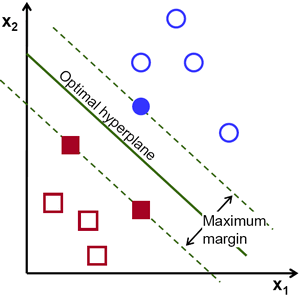

In [2]:
diabetis_data=pd.read_csv('pima-indians-diabetes.csv')
print(diabetis_data.shape)

(768, 9)


In [3]:
diabetis_data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Used dataset:** 
**Pima Indians Diabetes** Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

Our goal is to build a predictive model to check whether a patient has diabetic or not using **Support Vector Machine (SVM)**.

<class 'pandas.core.frame.DataFrame'>


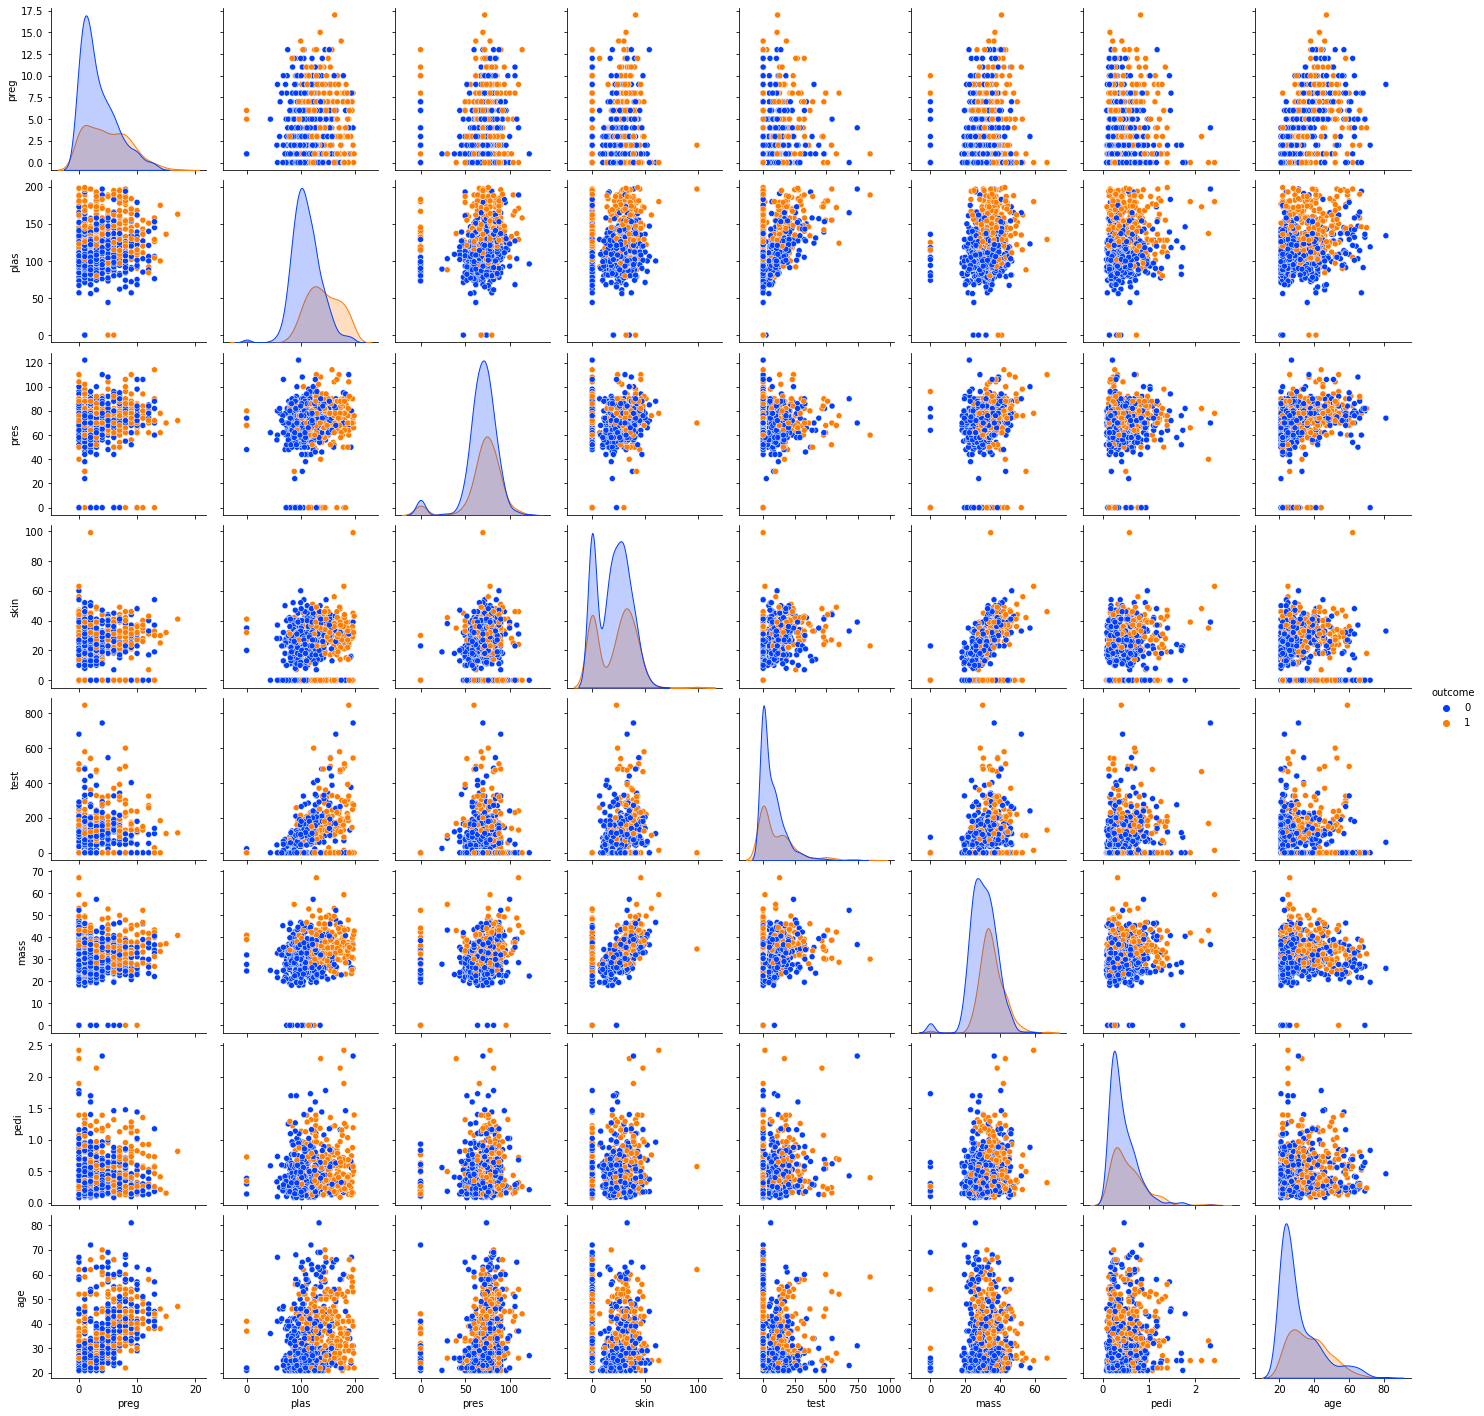

In [36]:
import seaborn as sns
from sklearn.datasets import load_iris
iris = sns.load_dataset("iris")
print(type(iris))
y1 = diabetis_data.outcome
X1 = diabetis_data.drop('outcome',axis=1)
sns.pairplot(diabetis_data, hue="outcome",palette="bright")

In [4]:
diabetis_data = diabetis_data.rename(columns = {"class":"outcome"})

In [5]:
diabetis_data['outcome'].value_counts()

0    500
1    268
Name: outcome, dtype: int64

In [6]:
diabetis_data = diabetis_data.rename(columns = {"class":"outcome"})

# Data visualization part. Ratio of normal and chances of diabetic 

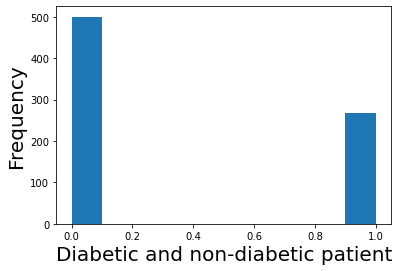

In [7]:
plt.hist(diabetis_data.outcome)
#plt.title("Normal",fontsize=20)
plt.xlabel("Diabetic and non-diabetic patient",fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.show()

In [8]:
target=diabetis_data['outcome']
print (target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: outcome, Length: 768, dtype: int64


In [9]:
independent = diabetis_data.drop(["outcome"],axis=1)
independent.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


# scaling of features

In [10]:
from sklearn.preprocessing import StandardScaler
data3 = independent.copy()
sc = StandardScaler()
data3[["preg",
"plas",
"pres",
"skin",
"test",
"mass",
"pedi",
"age"]] = sc.fit_transform(data3[["preg",
"plas",
"pres",
"skin",
"test",
"mass",
"pedi",
"age"]])

In [11]:
data3.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


# Splitting the dataset into training and testing

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(data3, target, test_size = 0.2)
print (x_train.shape)
print(y_train.shape)
print (x_test.shape)
print (y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


## fitting the model with training data
## Using linear kernel

#### Use when data is linearly separable

In [13]:
from sklearn.svm import SVC
C = 1.0  # SVM regularization parameter
classifier = SVC(kernel = 'linear', random_state = 0,C=1)
classifier.fit(x_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

## It's the time for model evaluattion

In [14]:
y_pred = classifier.predict(x_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[91  9]
 [28 26]]


# Accuracy score calculation in the model

In [15]:
from sklearn.metrics import accuracy_score,classification_report
print ("Testing Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Testing Accuracy :  0.7597402597402597
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       100
           1       0.74      0.48      0.58        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.71       154
weighted avg       0.76      0.76      0.74       154



# Evaluation using k fold cross validation

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
C=1
lr1= SVC(kernel = 'linear', random_state = 0,C=C)
scores = cross_val_score(lr1, data3, target, cv=10, scoring='accuracy')
#cv means number of folds
for k in scores:
  print (k)

print ('avarege accuracy will be',k.mean())  


	  



0.7142857142857143
0.7662337662337663
0.7922077922077922
0.7662337662337663
0.7402597402597403
0.7792207792207793
0.8051948051948052
0.7922077922077922
0.75
0.8157894736842105
avarege accuracy will be 0.8157894736842105


# Training with the Radial Basis Function (RBF) kernel

In [17]:
from sklearn.svm import SVC
C = 1.0  # SVM regularization parameter
classifier1 = SVC(kernel = 'rbf', random_state = 0)
classifier1.fit(x_train, y_train)

SVC(random_state=0)

In [19]:
y_pred1 = classifier1.predict(x_test)


from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
  
print ("Confusion Matrix : \n", cm1)

Confusion Matrix : 
 [[89 11]
 [26 28]]


In [20]:
from sklearn.metrics import accuracy_score,classification_report
print ("Testing Accuracy : ", accuracy_score(y_test, y_pred1))
print(classification_report(y_test,y_pred1))

Testing Accuracy :  0.7597402597402597
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154



# Evaluation using k fold cross validation

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
C=1
classifier1 = SVC(kernel = 'rbf', random_state = 0)
scores1 = cross_val_score(classifier1, data3, target, cv=10, scoring='accuracy')
#cv means number of folds
for k1 in scores1:
  print (k1)

print ('avarege accuracy will be',k1.mean())  

0.7272727272727273
0.8051948051948052
0.7662337662337663
0.7142857142857143
0.7402597402597403
0.7532467532467533
0.7792207792207793
0.8181818181818182
0.6973684210526315
0.8026315789473685
avarege accuracy will be 0.8026315789473685


# Training with the Polynomial kernel,
## Higher degree polynomial kernels allow a more flexible decision boundary, here we have chosen the degree of polynomial 3

In [22]:
from sklearn.svm import SVC
#C = 1.0  # SVM regularization parameter
classifier2 = SVC(kernel = 'poly', random_state = 0,degree=3)
classifier2.fit(x_train, y_train)

SVC(kernel='poly', random_state=0)

In [23]:
y_pred2 = classifier2.predict(x_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[95  5]
 [38 16]]


In [24]:
from sklearn.metrics import accuracy_score,classification_report
print ("Testing Accuracy with degree 3 polynomial kernel : ", accuracy_score(y_test, y_pred2))
print(classification_report(y_test,y_pred2))

Testing Accuracy with degree 3 polynomial kernel :  0.7207792207792207
              precision    recall  f1-score   support

           0       0.71      0.95      0.82       100
           1       0.76      0.30      0.43        54

    accuracy                           0.72       154
   macro avg       0.74      0.62      0.62       154
weighted avg       0.73      0.72      0.68       154



# Evaluation using k fold cross validation

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
C=1
classifier2 = SVC(kernel = 'poly', random_state = 0,degree=3)
scores2 = cross_val_score(classifier2, data3, target, cv=10, scoring='accuracy')
#cv means number of folds
for k2 in scores2:
  print (k2)

print ('avarege accuracy will be',k2.mean())  


0.7402597402597403
0.7272727272727273
0.7532467532467533
0.7792207792207793
0.7012987012987013
0.7402597402597403
0.7272727272727273
0.7662337662337663
0.75
0.7763157894736842
avarege accuracy will be 0.7763157894736842


In [26]:
from sklearn.datasets import make_circles

# For non-linear dataset

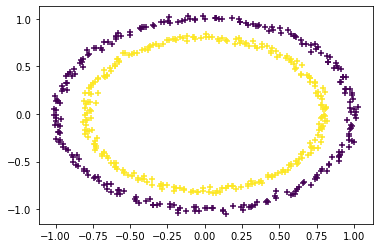

In [12]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

# generating data
X, Y = make_circles(n_samples = 500, noise = 0.02)

# visualizing data
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '+')
plt.show()


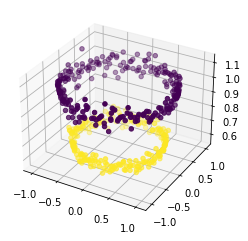

In [6]:
# adding a new dimension to X
X1 = X[:, 0].reshape((-1, 1))
X2 = X[:, 1].reshape((-1, 1))
X3 = (X1**2 + X2**2)
X = np.hstack((X, X3))

# visualizing data in higher dimension
fig = plt.figure()
axes = fig.add_subplot(111, projection = '3d')
axes.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True)
plt.show()


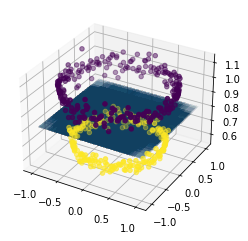

In [7]:
# create support vector classifier using a linear kernel and classify in 3D space
from sklearn import svm

svc = svm.SVC(kernel = 'linear')
svc.fit(X, Y)
w = svc.coef_
b = svc.intercept_

# plotting the separating hyperplane
x1 = X[:, 0].reshape((-1, 1))
x2 = X[:, 1].reshape((-1, 1))
x1, x2 = np.meshgrid(x1, x2)
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2]

fig = plt.figure()
axes2 = fig.add_subplot(111, projection = '3d')
axes2.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True)
axes1 = fig.gca(projection = '3d')
axes1.plot_surface(x1, x2, x3, alpha = 0.01)
plt.show()
